In [11]:
## Fetch Data from CSV file
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\hp\cda\portfolio projects\Digital Marketing Campaign Project\DigiMarketing Project.csv')


In [5]:
print(data.head())

   Campaign_ID       Campaign_Name    Platform  Start_Date    End_Date  \
0          301         Summer Sale  Google Ads  01-06-2024  30-06-2024   
1          302    Winter Clearance    Facebook  01-11-2024  30-11-2024   
2          303    Spring Promotion   Instagram  01-03-2024  31-03-2024   
3          304  Black Friday Deals     Twitter  20-11-2024  26-11-2024   
4          305   New Year Campaign    LinkedIn  01-01-2024  31-01-2024   

   Impressions  Clicks  Conversions  Ad_Spend ($)  Revenue ($)  CTR (%)  \
0        50000    3000          150          1500         6000     6.00   
1        70000    4000          250          2000         8000     5.71   
2        60000    2500          100          1200         3000     4.17   
3        80000    5000          400          2500        10000     6.25   
4        40000    1500           75          1000         2500     3.75   

   CPC ($)  ROAS  Engagement_Score Audience_Segment  
0     0.50   4.0                75     Young Adult

In [6]:
print(data.tail())

   Campaign_ID       Campaign_Name    Platform  Start_Date    End_Date  \
0          301         Summer Sale  Google Ads  01-06-2024  30-06-2024   
1          302    Winter Clearance    Facebook  01-11-2024  30-11-2024   
2          303    Spring Promotion   Instagram  01-03-2024  31-03-2024   
3          304  Black Friday Deals     Twitter  20-11-2024  26-11-2024   
4          305   New Year Campaign    LinkedIn  01-01-2024  31-01-2024   

   Impressions  Clicks  Conversions  Ad_Spend ($)  Revenue ($)  CTR (%)  \
0        50000    3000          150          1500         6000     6.00   
1        70000    4000          250          2000         8000     5.71   
2        60000    2500          100          1200         3000     4.17   
3        80000    5000          400          2500        10000     6.25   
4        40000    1500           75          1000         2500     3.75   

   CPC ($)  ROAS  Engagement_Score Audience_Segment  
0     0.50   4.0                75     Young Adult

In [2]:
## Install required libraries to connect with MySQL 
!pip install pandas sqlalchemy mysql-connector-python

In [12]:
import pandas as pd
from sqlalchemy import create_engine

In [14]:
# Define your MySQL connection parameters
username = 'root'
password = 'Aadi2006'
host = 'localhost:3306'  
database = 'DigiMarketing'

In [15]:
# Create a SQLAlchemy engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

In [15]:
data.rename(columns={
    "Ad_Spend ($)": "Ad_Spend",
    # Rename other columns as needed
}, inplace=True)

In [17]:
data.rename(columns={
    "Ad_Spend ($)": "Ad_Spend",
    # Rename other columns as needed
}, inplace=True)

In [18]:
data.rename(columns={
    "CTR (%)": "CTR",
    # Rename other columns as needed
}, inplace=True)

In [19]:
data.rename(columns={
    "CPC ($)": "CPC",
    # Rename other columns as needed
}, inplace=True)

In [21]:
# Assuming 'data' is your DataFrame
data['Start_Date'] = pd.to_datetime(data['Start_Date'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
data['End_Date'] = pd.to_datetime(data['End_Date'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

In [22]:
print(data.dtypes)

Campaign_ID           int64
Campaign_Name        object
Platform             object
Start_Date           object
End_Date             object
Impressions           int64
Clicks                int64
Conversions           int64
Ad_Spend              int64
Revenue               int64
CTR                 float64
CPC                 float64
ROAS                float64
Engagement_Score      int64
Audience_Segment     object
dtype: object


In [4]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [6]:
# Fill missing values
data.fillna(0, inplace=True)

In [7]:
print(data)

   Campaign_ID       Campaign_Name    Platform  Start_Date    End_Date  \
0          301         Summer Sale  Google Ads  01-06-2024  30-06-2024   
1          302    Winter Clearance    Facebook  01-11-2024  30-11-2024   
2          303    Spring Promotion   Instagram  01-03-2024  31-03-2024   
3          304  Black Friday Deals     Twitter  20-11-2024  26-11-2024   
4          305   New Year Campaign    LinkedIn  01-01-2024  31-01-2024   

   Impressions  Clicks  Conversions  Ad_Spend ($)  Revenue ($)  CTR (%)  \
0        50000    3000          150          1500         6000     6.00   
1        70000    4000          250          2000         8000     5.71   
2        60000    2500          100          1200         3000     4.17   
3        80000    5000          400          2500        10000     6.25   
4        40000    1500           75          1000         2500     3.75   

   CPC ($)  ROAS  Engagement_Score Audience_Segment  
0     0.50   4.0                75     Young Adult

In [26]:
# Load the DataFrame into the MySQL table
data.to_sql('digital_marketing_campaigns', con=engine, index=False, if_exists='replace')

5

In [28]:
# Load data back from SQL for analysis
df = pd.read_sql('SELECT * FROM digital_marketing_campaigns', con=engine)

In [29]:
# Show Data
print(df.describe())

       Campaign_ID   Impressions       Clicks  Conversions     Ad_Spend  \
count     5.000000      5.000000     5.000000      5.00000     5.000000   
mean    303.000000  60000.000000  3200.000000    195.00000  1640.000000   
std       1.581139  15811.388301  1350.925609    132.75918   610.737259   
min     301.000000  40000.000000  1500.000000     75.00000  1000.000000   
25%     302.000000  50000.000000  2500.000000    100.00000  1200.000000   
50%     303.000000  60000.000000  3000.000000    150.00000  1500.000000   
75%     304.000000  70000.000000  4000.000000    250.00000  2000.000000   
max     305.000000  80000.000000  5000.000000    400.00000  2500.000000   

            Revenue       CTR      CPC      ROAS  Engagement_Score  
count      5.000000  5.000000  5.00000  5.000000          5.000000  
mean    5900.000000  5.176000  0.53000  3.400000         76.000000  
std     3209.361307  1.136125  0.07874  0.821584          9.617692  
min     2500.000000  3.750000  0.48000  2.500000

<Axes: xlabel='Campaign_Name'>

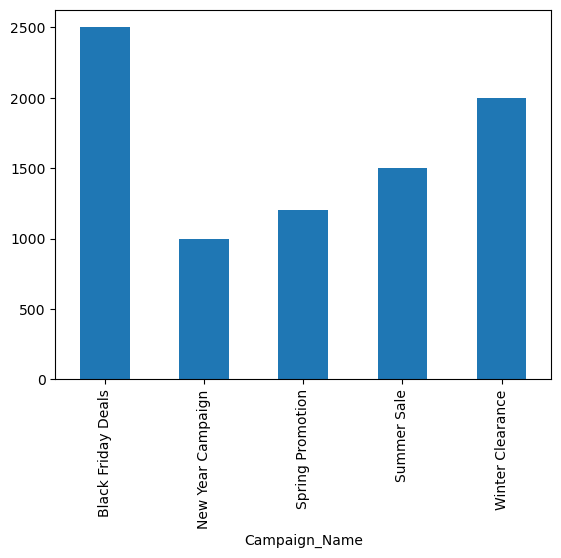

In [30]:
df.groupby('Campaign_Name')['Ad_Spend'].sum().plot(kind='bar')

In [16]:
# Analysis and cleaning done data nee to same 

data.to_sql('analysis_results', con=engine, if_exists='replace', index=False)
# Or save to CSV
data.to_csv('results.csv', index=False)